In [11]:
%%javascript
MathJax.Hub.Config({ TeX: { equationNumbers: { autoNumber: "AMS" } } });

<IPython.core.display.Javascript object>

### Аннотация
**планирование последовательности сборки (ASP)** является основой планирования процесса сборки и **проектирования для сборки (DFA)**. В ASP геометрическая разрешимость является необходимым условием для поиска допустимых сборочных последовательностей.  Получение и выполнение **отношений приоритета в сборке (APR)** являются важнейшими задачами при планировании геометрической разрешимости сборки. В данной работе предложен системный подход, называемый **геометрическим анализом ограничений (GCA)**, и разработана соответствующая программная система, интегрированная с САПР. Используя эту систему, достаточно несколько нажатий мыши в CAD проекте, чтобы полностью и правильно получить отношения приоритета в сборке (APRs). Затем все геометрически разрешимые последовательности сборки могут быть выведены автоматически. Кроме того, в методе GCA разработан и реализован оптимальный алгоритм, с помощью которого из множества геометрически выполнимых последовательностей можно найти наиболее оптимальную с точки зрения удобства эксплуатации последовательность сборки.


## 1 Введение 
   В современном производстве задачи сборки обычно занимают значительный процент от общего времени производства и общей стоимости производства. **Boothroyd** [1] утверждает, что сборочные задачи составляют 20-70% от общего объема производственных работ. В традиционном производстве на сборочные задачи приходится около 50% от общего времени производства и более 20% от общей стоимости производства [2].

За прошедшие десятилетия, учёные-инженеры посвятили много трудились над разработкой систем моделирования и производства, ткаих как, CAD, CAPP, и CAM системы. С другой стороны, усилия, направленные на разработку систем проектирования конструкций и процесса сборки, настолько ограничены, что связанные с сборкой вопросы становятся тонкими местами в развитии современных производственных технологий.

Соответствуя компонентам CAD, CAPP и CAM, исследования, связанные с сборкой, могут быть классифицированы на три области. **Первая область** касается оценки и оптимизации структуры сборки, таких как _проектирование для сборки (DFA)_ , _проектирование для разборки (DFD)_ и _проектирование для производства (DFM)_ и т. д. Были разработаны и использованы некоторые компьютеризированные инструменты  для повышения эффективности сборки конструкции[1]. Эти подходы и связанные с ними инструменты становятся ключевыми вспомогательными технологиями в комплексном проектировании [3-6]. **Второй областью** является _автоматизированное планирование процесса сборки (CAAPP)_. Это намного сложнее по сравнению с однокомпонентным процессом планирования. Последовательность сборки, инструменты, приспособления и средства, и т. д. , должны быть тщательно рассмотрены в соответствии с конструкцией сборки [7-9]. Ввиду этих соображений, последовательность сборки является основой всего процесса [10, 11]. **Третья область** - планирование и моделирование сборочной системы для поиска наиболее эффективного развертывания системы и наиболее оптимальных операционных стратегий [13].

В этой статье, сосредоточенной на описании и оптимизации геометрически разрешимых сборочных последовательностей, предлагается систематический подход под названием **Анализ геометрических ограничений (GCA)**. В методе GCA можно легко агрументировать **отношения приоритета в сборке (APR)**. Затем все геометрически разрешимые последовательности сборки могут быть получены автоматически. Кроме того, в GCA разработан и реализован оптимальный алгоритм, с помощью которого может быть легко вычислена наиболее оптимальная последовательность из огромного колличества геометрически разрешимых сборочных последовательностей.

 Остальная часть статьи устроена следующим образом. В разделе 2 рассматривается и анализируется литература по планированию сборочных последовательностей. В разделе 3, подробно объяснены и изложены определения, принципы и алгоритмы GCA. В разделе 4 представлена и проиллюстрирована на примере блок-схема и программная система метода GCA. В разделе 5 приводятся рассужения, а раздел 6 завершает работу над документом.

## 2 Обзор литературы 
Геометрическая разрешимость означает, что два узла или компонента могут быть собраны или разобраны без столкновения. Для описания геометрических интерференционных связей между деталями или узлами конструкции **Bourjault** предложил определение _отношения приоритета в сборке (APRs)_ [14]. APRs представляют собой внутренние и скрытые отношения геометрических ограничений, которые определяются структурой конструкции в сборке. APR должны отвечать ASP (плонированию последовательности сборки), иначе некоторые компоненты не могут быть успешно собраны. Таким образом, ключевым моментом в геометрически разрешимой последовательности сборки является правильное и полное определение APRs.

В [14] для представления сборки была предложена схема связей. На основе этой схемы была сформирована серия вопросов _"Да-нет"_ о геометрической разрешимости, которые были заданны пользователю. Чтобы получить геометрически разрешимые последовательности сборки, пользователь должен был ответить на сотни и тысячи вопросов _"Да-нет"_ , относящихся к структуре сборки. 
**Homem de Mello** и **Sanderson** [10] применили метод анализа _"cut-set"_ при планировании последовательности сборки и разработали три правила упрощения, с помощью которых количество запросов можно было уменьшить на 95%. Несмотря на это, пользователю все еще нужно было ответить на 111 вопросов при планировании последовательности сборки из 11 частей. 

Чтобы уменьшить количество вопросов, **Болдуин** и др. [15] изменил стиль запроса. Исправив _"Да-нет"_ вопросы, на _"какие"_. Для каждой связи были заданы следующие вопросы: _"какие связи должны быть установлены до этой связи?"_ и _"какие связи могут быть установлены после этой связи?"_ В этом методе число вопросов было уменьшено в два раза от числа связей на схеме связей. Тем не менее, было слишком трудно ответить на эти _"какие"_ вопросы правильно и полностью, особенно для сложных конструкций.

**Уилсон** [16] улучшил метод анализа _"cut-set"_ и представлен человеко-компьютерный интерактивный метод ASP, поддержанный проектом САПР сборки [17]. В этом методе cистема CAD позволяет пользователю указать помехи детали, если столкновение произошло при разборке. Этот метод анализа не был ни слишком простым, ни слишком сложным. Между тем, детальная информация о помехах может быть использована чтобы ускорить процесс вывода.

**Готтиполу** и **Гош** [18] предложили автоматический ASP способ, в котором контактные и интерференционные решетки определялись бы вместе с шестью ортогональными направлениями $ (+X,+Y,+Z,-Х,-Y,-Z) $. Учитывая все контакты и помехи массивы среди компонентов, геометрическая выполнимая сборка последовательности может быть получена автоматически. Однако это
метод действителен только для ортогональной сборки структуры.

На основании вышеизложенного анализа, можно сделать вывод о том, что подходы к выводу ASP можно разделить на два типа: **прямой ASP** и **косвенный ASP**. Методы, такие как метод на основе запросов -" да-нет"_ , метод _"cut-set"_  и упрощенный метод _"cut-set"_ , и т.д. , эти подходы основывают свой процесс рассуждения через схему связей. Поскольку схема связей слишком проста, чтобы содержать достаточно информации для анализа ASP, пользователь должен ответить на ряд вопросов, чтобы рассказать системе, как выглядит сборка. Именно поэтому они классифицируются как косвенные методы. Чтобы преодолеть этот недостаток, следует построить метод прямого рассуждения, чтобы в полной мере воспользоваться преимуществами сведений о конструкции сборки, включая компоненты _«и связи»_ структуры. Метод контактной и интерференционная решетки, является простым представителем прямого ASP. Метод **Уилсона**, поддержанный проектом CAD, должен быть классифицируется как прямой и косвенный смешанный подход. Сравнивая с хорошо разработанными косвенными подходами, необходимо более глубоко изучить прямые подходы.

В этой статье, основанной на **Rajan** и **Nof** [19], Предложен прямой ASP метод, называющийся _анализ геометрических ограничений (GCA)_. Применяя этот метод, APRs и геометрические разрешимые последовательности сборки, могут быть получены автоматически. Кроме того, может быть легко выбрана оптимальная геометрически разрешимая последовательность сборки. По сравнению с **Rajan** и **Nof** [19], преемущества метода GCA перечислены следующим образом.
1. В [19], для получения APR были предложены и интегрированы ряд определений и уравнений, таких как, _направление лицевого сопряжения (FMD)_ , _направление сопряжения (MD)_ , _прпятствующее направление (CD)_ , _направление препядствующее сопряжению (CMD)_ и _направление расположения (LD)_ и т.д. Путем тщательного изучения автор обнаружил, что в геометрически разрешимом порядке сборки, среди всех этих определений, было необходимо только _препятствующее направление (CD)_ . И определение _минимально блокирующей конструкции (MCAS)_ предлагается для того, чтобы установить связь между CDs и APR. Всякий раз, когда определены препядствующие направления, каждой пары деталей, приложения могут быть легко выведены. Это упрощенное определение и удобный расчет делают анализ ASP более эффективным по сравнению с оригинальным методом.

1. Помимо теоретической основы, реализация подходов и алгоритмов также разработанна и интегрированна в метод GCA. Как показано на ___рис. 1___, потребитель может удобно определить направления ограничений пары компонентов, достаточно только щелкнуть мышью на проекте CAD. Учитывая CDs, APR и геометрические выполнимые последовательности сборки могут быть аргументированы с использованием алгоритмов, разработанных в методе GCA.

1.	В методе GCA построен и реализован оптимальный геометрический алгоритм поиска допустимых сборочных последовательностей. Используя этот алгоритм, наиболее оптимальная последовательность(ы) сборки с наибольшим рабочим пространством может быть найдена автоматически из большого количества геометрически разрешимых последовательностей сборки.

 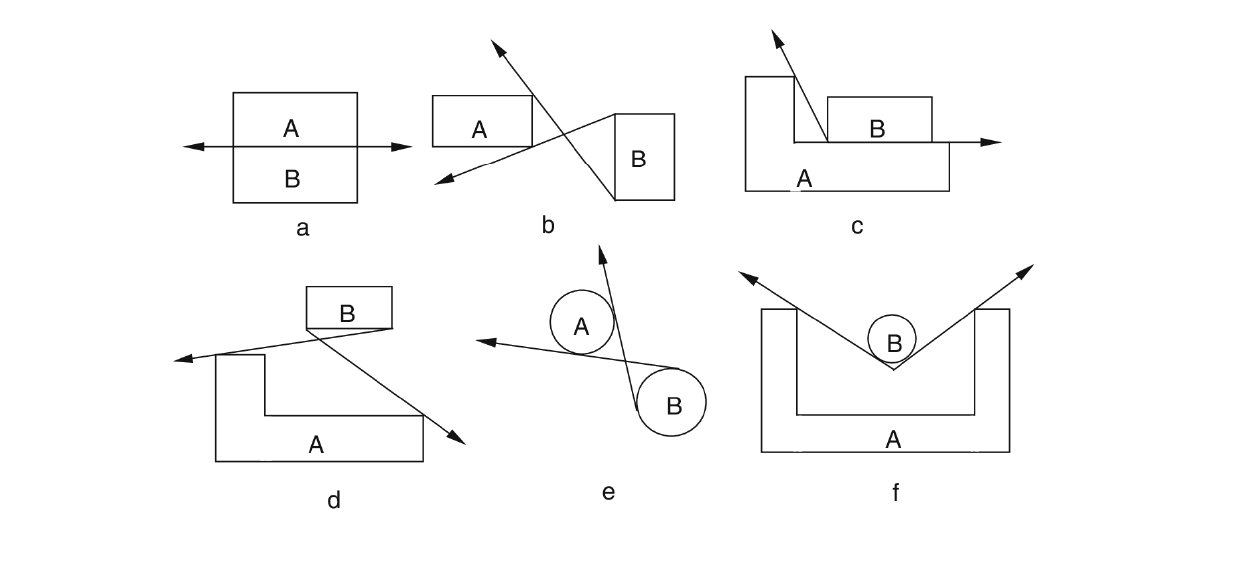 ___рис.1 Некоторые типичные направления ограничений___ 

## 3 Анализ геометрических ограничений (GCA) 
### 3.1 основные определения 
В сборке геометрические отношения между деталями могут быть описаны с использованием следующих понятий.

_`Определение 1.`_ **Препятствующие направления (CD).**
Препятствующие(блокирующие) направления детали $j$ к детали $i$ - это множество направлений, обозначаемых как $CD_{ij}$, вдоль которого перемещение $i$ будет заблокировано из-за наличия $j$.
Как показано на ___рис.2___, Сборка $N$ состоит из 5 деталей $ N=\{A,B,C,D,E\} $ . На ___рис.3___ изображены направления ограничевающие деталь $Е$ по отношению к детали B, и написано следующим образом.
\begin{equation}\label{CD_{EB} = (α_1,α_2)}CD_{EB} = (α_1,α_2)
\end{equation}

Учитывая приведенное выше определение, препятствующие направления некоторой конструкции $S$ (узел сборки состоит из более чем одной детали) к детали $i$ можно вычислить, используя следующее уравнение.
\begin{align}\label{CD}CD_{i,s} = \bigcup_{j\in{S}} {CD_{ij}}\tag{2} \end{align}

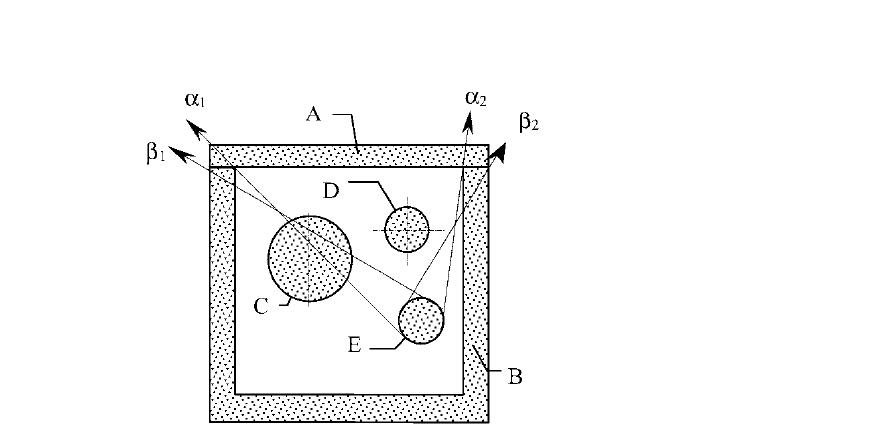 ___рис.2 Эскиз сборки___

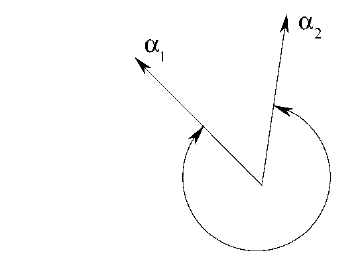 ___рис.3 Ограничевующие направления ${CD_{EB}}$___

_Уравнение (2),_  означает, что препядствующие направления конструкции $S$ к части $i$ равно сумме всех препятствующих направлений каждого элемента в $S$ к $i$. например, препядствующие направления состояния сборки $S=\{A,B\}$ к части $E$ можно вычислить следующим образом. 

$$CD_{E,S} = CD_{EA} \bigcup CD_{EB}
 = (\beta_{1},\beta_{2})  \bigcup  (\alpha_{1},\alpha_{2})
 = [0,2\pi)
 = I $$

Как показано на ___рис. 4___, препятствующие направления $S=\{A,B\}$ к $E$, идентично множеству всех направлений, обозначенных как $I = [0,2\pi)$. Это означает, что $E$ полностью заблокирован во всех направлениях $S$. Однако если конструкция$S$ установлена, то $E$ не может быть успешно собран. Таким образом, $E$ называется полностью заблокированной деталью конструкции $\{A,B\}$. 

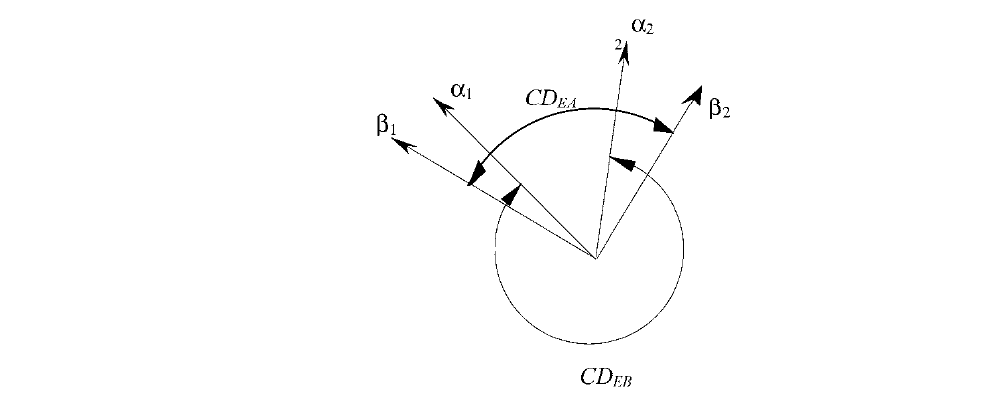 ___рис.4 Направления, ограничевающие сборку конструкци $S=\{A,B\}$, по отношению к $Е$___ 

_`Определение 2.`_ **Блокирующая конструкция (CAS).**
Если препятствующие направления конструкции $S$,по отношению к детали $i$ , равно всем направлениям множества $I$, то конструкция $S$ называется блокирующей конструкцией, по отношению к детали $i$. А $i$, в свою очередь, называется деталью, полностью заблокированной конструкцией $S$ . Согласно определениям _1, 2 и Ур. (2)_ , для детали $E$ можно указать множество блокирующих конструкций.


\begin{align}
    CAS_{E}^{1} &= \{A,B\}     \tag{3} \\
    CAS_{E}^{2} &= \{A,B,C\}   \tag{4} \\
    CAS_{E}^{3} &= \{A,B,C,D\} \tag{5} \\
\end{align}
$$...$$

Среди трёх вышеперечисленных, ${CAS_{E}^{1} = \{A,B\}}$ - наименьшая из них. 

\begin{align}
    CAS_{E}^{1} \subset     
    CAS_{E}^{2} \subset   
    CAS_{E}^{3} \tag{6} \\
\end{align}

Ссылаясь на ___рис. 2___, можно обноружить, что если какая-либо деталь в  ${CAS_{E}^{1}}$ удаляется, то препятствующих направлений ${CAS_{E}^{1}}$ для $E$ будет меньше, чем все направления установленные множеством ${I = [0,2π)}$. Другими словами, если какая-либо деталь в конструкции ${CAS_{E}^{1}}$ удаляется, то этот узел перестаёт быть блокирующей конструкцией для $Е$. Таким образом, ${CAS_{E}^{1}}$ называется минимально блокирующей конструкцией для детали $E$. 

_`Определение 3.`_ **Минимально блокирующая конструкция (MCAS).**
Минимально блокирующая конструкция, своего рода является такой блокирующей конструкцией, что если какой-либо элемент из неё удаляется, препятствующих направлений будет меньше, чем монжество всех направлений $I = [0,2π)$. Поэтому минимально блокирующая конструкция для детали должна соответствовать APR этой детали. Деталь должна быть установленна до сборки любой из, минимально блокирующих её конструкций. В противном случае такая деталь не может быть успешно установлена в изделие. 


### 3.2 Aнализ геометрических ограничений (GCA) основанный на отношениях приоритета в сборке (APR)
Cследующая теорема может быть использована для поиска деталей, которые обладают минимально блокирующей конструкцией. 

_`Теорема 1.`_
В сборке $N$, если деталь $i$ полностью заблокированна кострукцией $S = \{N - i\}$, то этоа деталь должна обладать миниимально блокирующей конструкцией (конструкциями). Кроме того, если $i$ не полностью заблокированна $S = \{N - i\}$, тогда миниимально блокирующей конструкции для $i$ нет (см. Приложение для доказательства). 

В качестве примера, деталь $E$ на ___рис. 2___ полностью ограниченна конструкцией $S=\{A,B,C,D\}$. Согласно теореме 1, деталь $Е$ должна обладать миниимально блокирующей конструкцией (конструкциями). Как показано на ___рис. 5___, из-за присутствия $S=\{A,B,C,D\}$ , множество напрвлений для детали $E$ могут быть разделены на 8 секторов и 8 направлений стрелок. Каждый сектор или направление стрелки соответствует некоторым препятствующим деталям (см. ___рис. 5___). Согласно определению минимально блокирующей конструкции, MCAS части $E$ можно вычислить следующим образом:
$$\begin{equation} MCAS_E = \wedge_{r\in[1,R]} C_E^r \tag{7}
\end{equation}$$


Где 
- $MCAS_E$ означает минимально блокирующую конструкцию детали $E$.
- $r$ означает последовательность секторов, $r\in[1,R]$ , $R=16$.
- $C_E^r$ означает препятствующие детали соответствующие $r$ сектору или направлению.

Используя уравнение (7), MCAS для $E$ может быть посчитана следующим образом:
\begin{align}
    MCAS_E = &B\wedge B\wedge(B\vee C)\wedge(B\vee C)\wedge(A\vee B\vee C)\wedge  \notag\\
             &(A\vee C)\wedge(A\vee C)\wedge(A\vee C)\wedge(A\vee C\vee D)\wedge  \notag\\
             &(A\vee D)\wedge(A\vee D)\wedge(A\vee D)\wedge(A\vee B\vee D)\wedge  \notag\\
             &(A\vee B)\wedge(A\vee B)\wedge B  \notag
\end{align}

Упростим до дизъюнктивной нормальной формы,
$$MCAS_E = (A\wedge B)\vee (B\wedge C\wedge D)$$
Таким образом часть $E$ имеет следующие две,минимально блокирующих, конструкций.
\begin{align}  \notag\\
   &MCAS_E^1 = \{A,B\}, \tag{8} \\  \notag\\
   &MCAS_E^2 = \{B,C,D\}. \tag{9} \\
\end{align}


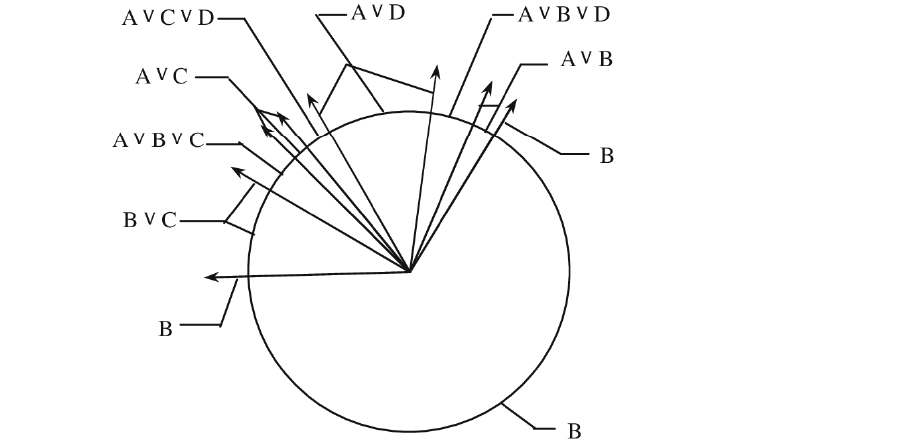 ___рис.5 Анализ MCAS для детали E___

Соответственно, отношения приоритетов в сборке (APR) детали $E$ , следующие:
\begin{align}
   &APR1:\ \ \ \ \ \ E\ \ \ \ \ NL\ \ \ \ \ (A\wedge B), \tag{10} \\
   &APR2:\ \ \ \ \ \ E\ \ \ \ \ NL\ \ \ \ \ (B\wedge C\wedge D). \tag{11}
\end{align}


Здесь NL означает "не позднее чем". APR1 в уранении (10) означает, что деталь $Е$ должна быть собрана до сборки деталей $А$ и $В$. И APR2 в уранении (11) означает, что часть $E$ должна быть установлена до того, как в сборку будут добавлены $B$, $C$ и $D$.

Принимая промышленную сборку (см. ___рис. 6___) в качестве примера на ___рис. 7___ показаны направления ограничений детали №3. Из уравнению (7) следуют два утверждения APR,
\begin{align}
   &APR1:\ \ \ \ \ \ 3\ \ \ \ \ NL\ \ \ \ \ (1\wedge 2),\notag \\
   &APR2:\ \ \ \ \ \ 3\ \ \ \ \ NL\ \ \ \ \ (1\wedge 4).\notag
\end{align}

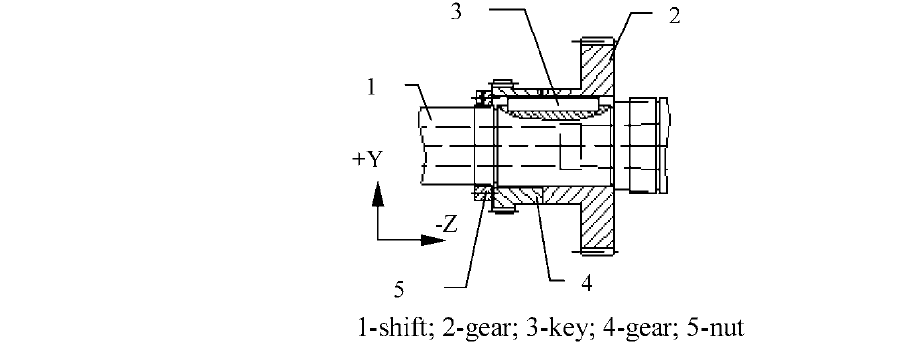 ___рис. 6 Промышленная сборка___

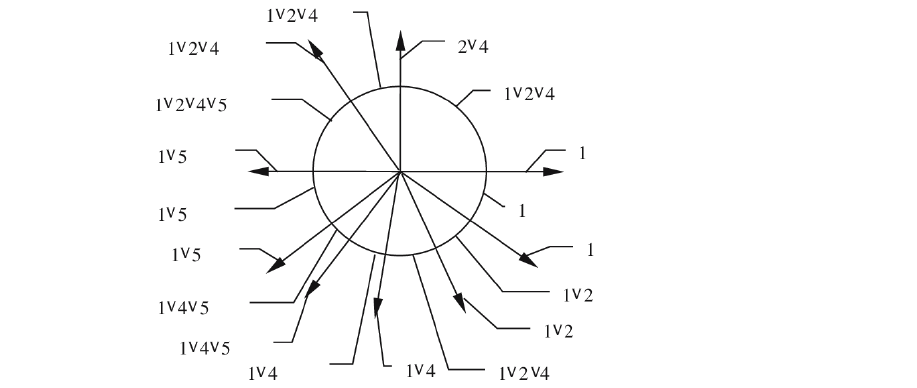___рис. 7 Блокирующие направления для детали №3___

Эти два утверждения APR означают, что деталь №3 должна быть добавлена в сборку перед сборкой деталей №1 и №2 или №1 и №4. Этот пример свидетельствует, что метод GCA может быть успешно применён в ортогональных сборочных структурах.

### 3.3 Выбор оптимальной последовательности сборки 
Полученные APR, геометрически разрешимые последовательности процесса сборки, могут быть вычислены автоматически алгоритмом в GCA. Обычно количество геометрически разрешимых сборочных последовательностей для процесса сборки достаточно большое. В этом случае проектировщику необходимо сравнить эти геометрически разрешимые последовательности и выбрать оптимальную из множества возможных.

С точки зрения геометрии, оптимальная последовательность процесса сборки - это план сборки, в котором каждый компонент может быть установлен с наибольшей свободой в процессе установки (то есть с большим колличеством разрешённых направлений), так что продукт легко собрался и компоненты можно было бы легко испытать и/или отрегулировать. Как можно себе представить, что без компьютерного инструмента эта задача оптимизации может быть невыносимой для инженера-конструктора. В рамках этого исследования была разработанна функция выбора оптимальной последовательности сборки и интегрирована в GCA метод. 

_`Определение 4.`_ **Угол установки (AA)**. 
В последовательном процессе сборки, угол установки компонента - это множество направлений, в которых деталь может быть безпрепятственно установленна в уже собранную конструкцию. В математике процесс оптимизации можно смоделировать следующим образом. Для сборки $N= [1,2,3, ... ,n)$ геометрически разрешимые последовательности процесса сборки могут быть выражены как:


\begin{align}
    AS_i ::= \{P_1^i \longrightarrow P_2^i \longrightarrow P_3^i,\ ...\ ,\longrightarrow P_n^i\}\tag{12}
\end{align}

где $i = 1,2,3,...,m$ представляют собой $i$-ю геометрически разрешимую послеловательность процесса сборки.


В соответствии с оределением 1, угол установки детали равен множеству всех направлений ${I = [0,2π)}$ минус препятствующие направления деталей, уже установленных в конструкцию. Так, угол установки детали $P_j^i$ равен:

\begin{align}
    AA_{P_j^i} = I - CD_{P_j^i,S_{P_j^i}}, \tag{13}
\end{align}

где $S_{P_j^i} = \{P_1^i,P_2^i,...,P_{j-1}^i\}$ обозначает уже собранный узел, до установления детали $P_j^i$;

$ CD_{P_j^i,S_{P_j^i}}$ обозначает блокирующие направления $S_{P_j^i} = \{P_1^i,P_2^i,...,P_{j-1}^i\}$ для детали $P_j^i$


Ссылаясь на уравнение (2), блокирующие направления $S_{P_j^i} = \{P_1^i,P_2^i,...,P_{j-1}^i\}$ для детали $P_j^i$ равны:

\begin{align}
    CD_{P_j^i,S_{P_j^i}} =  \bigcup_{k=1}^{j-1} CD_{P_j^i,S_k^i}. \tag{14}
\end{align}


Из уравнений (13) и (14) следует, что угол установки детали $P_j^i$ может быть посчитан как,

\begin{align}
    AA_{P_j^i} = I - \bigcup_{k=1}^{j-1} CD_{P_j^i,S_k^i}, \tag{15}
\end{align}


Для того чтобы облегчить процесс сборки, каждая деталь должна быть собрана с углом установки как можно большим. Основываясь на этом соображении, для оценки качества последовательности сборки, с точки зрения удобства, используется стреднее геометрическое  углов установки. Между тем, поскольку различные детали имеют различные функциональные возможности и трудности в установке, для каждой детали назначается взвешенный коэффициент. Итак, суммарный индекс строится следующим образом.

\begin{align}
    AA_{AS_i} = \sum k_{P_j^i} \sqrt{\prod_{j=1}^n \left(AA_{P_j^i}\right)^{k_{P_j^i}}} = 
    \sum k_{P_j^i} \sqrt{\prod_{j=1}^n \left(I - \bigcup_{k=1}^{j-1} CD_{P_j^i,S_k^i}\right)^{k_{P_j^i}}} , \tag{16}
\end{align}


где $ AA_{AS_i}$ представляет суммарный угол установки $i$-й последовательности сборки $AS_i$; $\ \ \ k_{P_j^i}$ обозначает взвешенный коэффициент соответствующей детали $P_j^i$. Уравнение (16) дает целевую функцию в поиске оптимальной последовательности процесса сборки. Последовательность процесса сборки с наибольшим суммарным углом установки будет выбрана в качестве оптимальной.

## 4 Компьютеризация метода GCA
Как показано на __рис. 8___, был компьютеризирован анализ метода GCA, и реализован и интегрирован тремя модулями.

_`Модуль 1`_ - это поиск отношений приоритетов в сборке  (APR-ов). Такие приоритеты последоватетельностей могут быть правильно и полностью рассчитаны с помощью человеко-компьютерного интерактивного анализа, поддерживаемым сборокой проекта САПР.
_`Модуль 2`_ - это поиск всех геометрически разрешимых последовательностей процесса сборки. Согласно APR-ам, геометрические разрешимые последовательности разборки можно высчитать вне автоматизации. Затем геометрически разрешимые последовательности сборки могут быть получены путем реверсирования последовательностей разборки.  
_`Модуль 3`_ - это поиск оптимальной последовательности. Можно рассчитать угол установки для каждой операции установки и суммарный угол установки для каждой последовательности процесса сборки. Затем можно выбрать наиболее оптимальную геометрически возможную последовательность сборки. 

Как показано на  ___рис. 9___, с помощью этой системы анализируется пример из сборки ___рис. 2___. Проект сборки САПР импортируется из системы САПР с использованием технологии OLE. Интерфейс показывает, что он рассматривает в данный момент детали $D$ и $E$. Пользователь может определить направление препятствия, щелкнув мышью на чертеже САПР по деталям, чтобы нарисовать две граничные линии из всего множества блокирующих направлений, и два щелчка мыши для выбора каждой линии, слеловательно всего требуется четыре щелчка мыши. Затем 5-й щелчок мыши необходим, чтобы сообщить компьютеру, какой из четырех множеств направлений, образованных двумя линиями, непосредственно является множеством набора ограничений. Как показано на ___рис. 9___, координаты пяти точек будут записаны в качестве данных о препятствиях и сохранены в базе данных для дальнейшего использования.


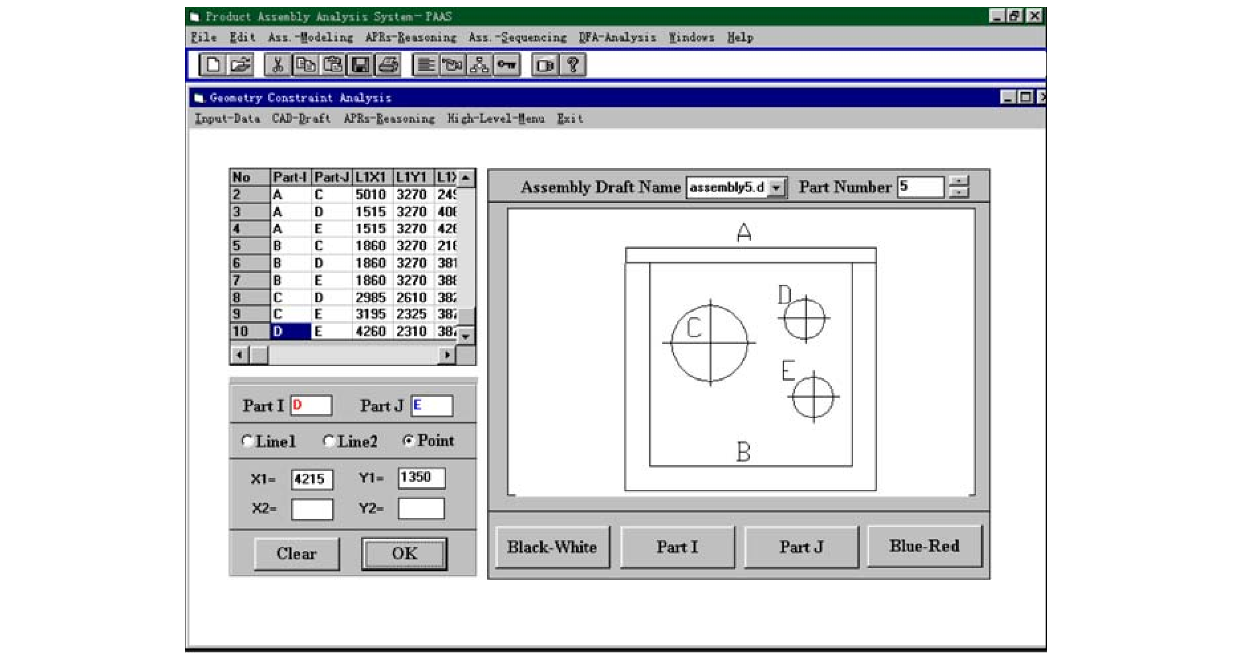 ___рис. 9 Анализ множества препятствующих направлений___

Как показано на  ___рис. 10___, основанный на данных о препятствиях, система может расчитать препядствующие направления для каждой пары деталей. Затем полностью заблокированные детали $C$, $D$ и $E$ могут быть вычислены, как показано в списке "Constrained Parts". Например, при двойном щелчке по детали $E$ препядствующие ей сектора будут вычислены в таблице "Constrained Sectors". И APR-ы $E$ выводятся как $\{A,B\}$ и $\{B,C,D\}$ , как показано в списке приложений. Когда все APR-ы получены и сохранены в базе данных, геометрически разрешимые последовательности разборки могут быть аргументированы. Затем геометрические разрешимые последовательности сборки могут быть получены путем реверсирования последовательностей разборки. Угол устрановки для каждой операции сборки и суммарный угол сборки для каждой геометрически разрешимой последовательности сборки может быть вычислена, как показано в _Таблице 1._

Всего есть 42 геометрически разрешимых последовательности сборки в нашем примере. Здесь, 6 последовательностей
начинаются с детали $A$; 4 последовательности начинаются с детали $B$; 10 последовательностей начинаются с детали $C$; 10 последовательностей начинаются с детали $D$;и 12 последовательностей начинаются с детали $E$. В _Таблице 1_ приведены только
некоторые типичные последовательности, чтобы сэкономить место. Среди этих последовательностей наиболее оптимальными являются геометрически разрешимые последовательности сборки: $$D \rightarrow E \rightarrow C \rightarrow A \rightarrow B\\и\\ E \rightarrow D \rightarrow C \rightarrow A \rightarrow B$$ 
с одинаково большим суммарным углом сборки $175.6434$. В этих двух оптимальных последовательностях, первыми устанавливаются детали $D$ и $E$, соответственно. 
Если деталь $B$ должна быть собрана первой в качестве основы в сборке, то оптимальная последовательность сборки должна
быть $B \rightarrow E \rightarrow C \rightarrow D \rightarrow A$ , где суммарный угол сборки равен $117. 5997$.

В _Таблице 1_ взвешенный коэффициент каждой детали равен $0.2$ . Если эти взвешенные коэффициенты скорректированы в соответствии с функциональностью деталей и сложностью сборки, тогда оптимальный результат может быть разным.

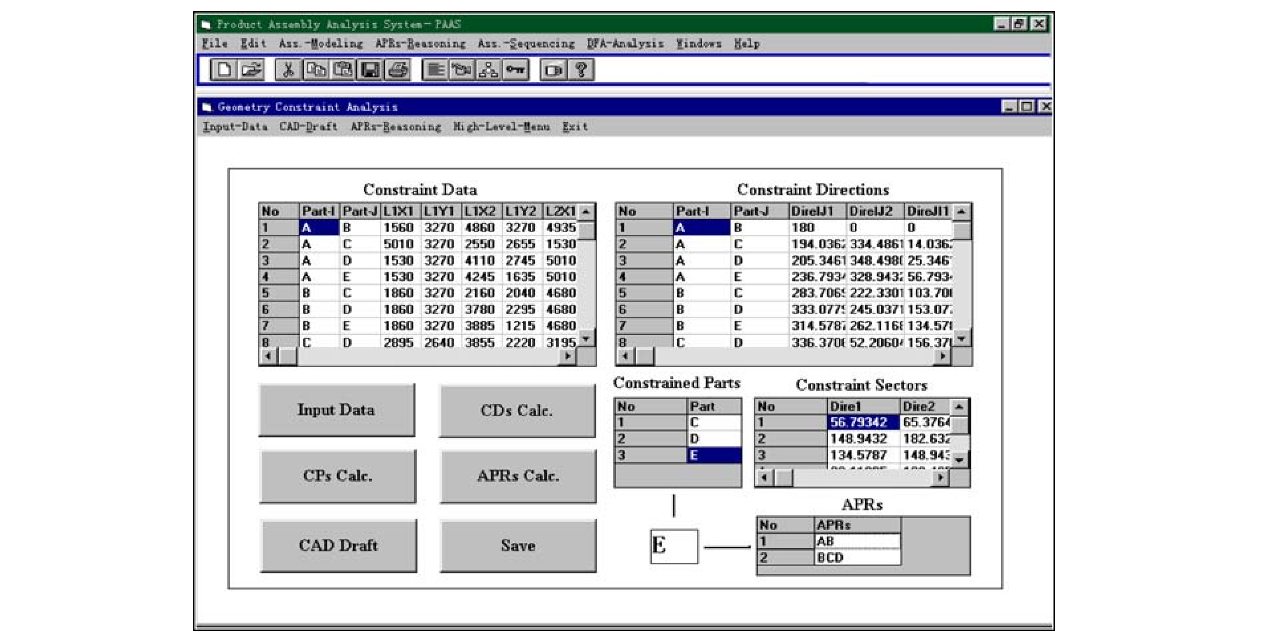

___рис. 10 Aнализ геометрических ограничений (GCA) основанный на отношениях приоритета в сборке (APR)___

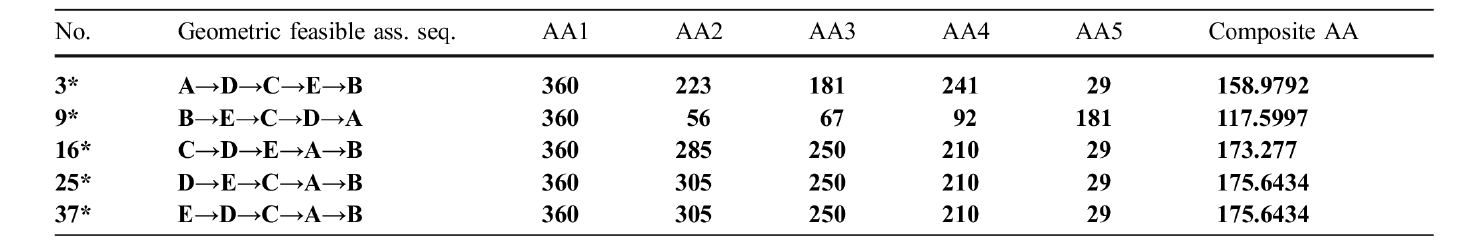

___рис. 11 Геометрически разрешимая последовательности сборки и их углы установки (k=0.2 для каждой детали)___

Чтобы убедиться, что GCA можно использовать в более сложной сборке, попробуем проанализировать сборку из 10 деталей (см. ___рис. 11___). Как
показано на ___рис. 12___, система выводит, что части $F$, $H$, $I$ и $J$ полностью заблокированны, и APR этих деталей выводятся автоматически. Например, APR детали $H$ следующие:$ (A\wedge B\wedge C\wedge G), (A\wedge C\wedge E\wedge G),
(A\wedge C\wedge F\wedge G), (A \wedge C \wedge G\wedge I)\ \ \ и\ \ \ (A\wedge C\wedge G\wedge J)$. Смотря на структуру сборки на ___рис. 11___, можно увидеть, что это все возможные  и полностью правильные APR-ы части $H$.

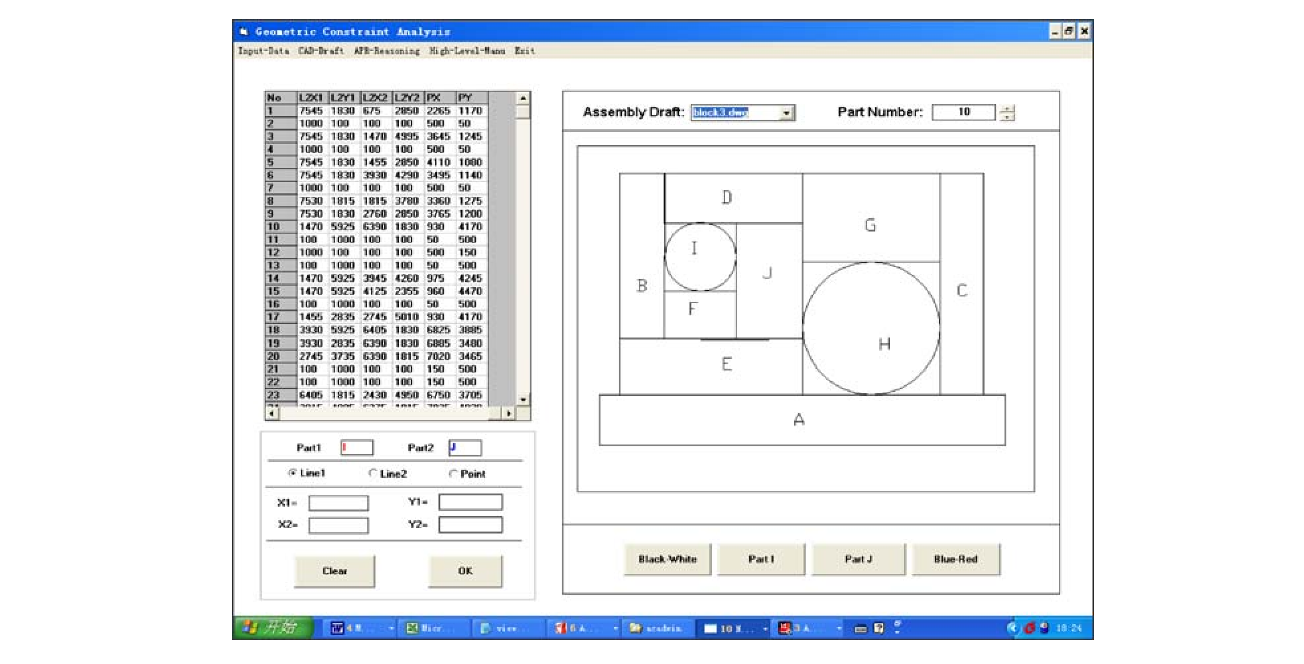 ___рис. 11 Конструкция с десятью деталями___

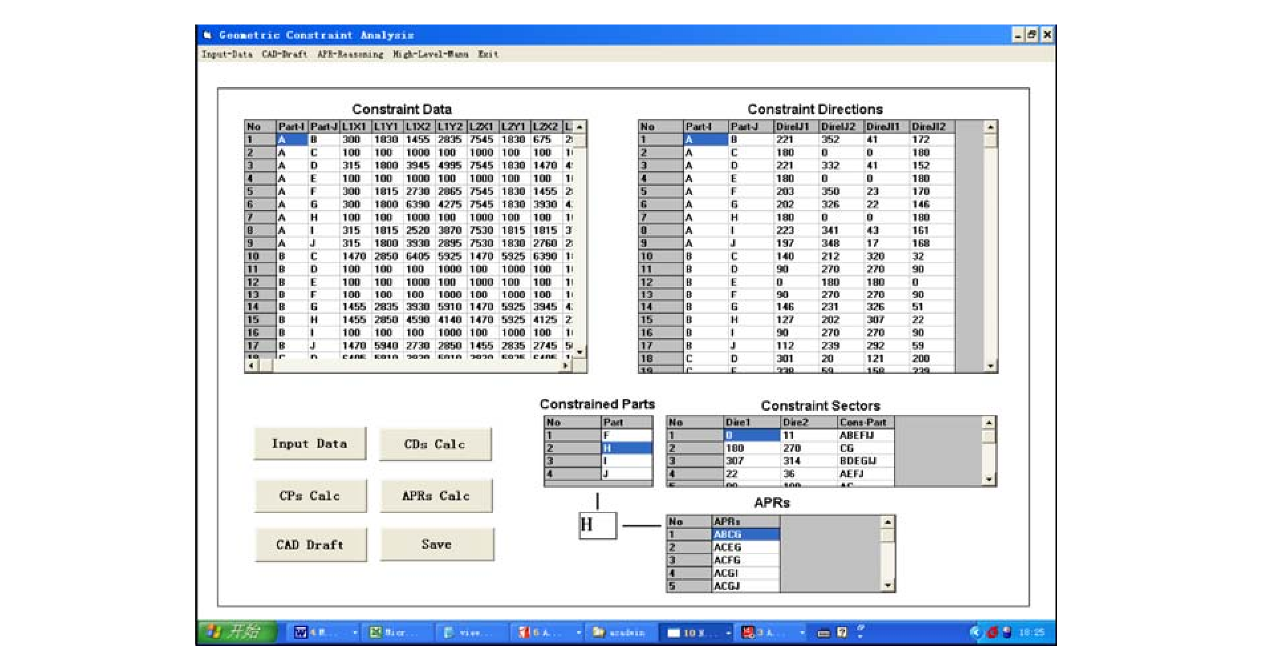 ___рис. 12 Aнализ геометрических ограничений (GCA) основанный на отношениях приоритета в сборке (APR)___

## 5 Рассуждения
Планирование процесса сборки изделия играет важную роль в создани продукта. Планирование последовательности сборки и оптимизация является основой процесса планирования сборки. Начиная с середины 1980-х годов, многие исследователи работают в этой области и делают много значительных достижений. Однако большинство предыдущих работ относятся к косвенному подходу ASP, который моделирует сборку как схему связей и обосновывает геометрически допустимые последовательности, большим количеством запросов. Это означает, что схема связей слишком проста, чтобы содержать достаточно информации для анализа ASP. Чтобы преодолеть этот недостаток, следует построить метод прямого рассуждения, чтобы в полной мере использовать преимущества информации о конструкции сборки.

В этой статье предлагаелся прямой метод, называемый анализом геометрических ограничений (GCA). В GCA отношения между компонентами описываются с использованием унифицированной концепции препядствующих направлений (CD). Используя GCA, все отношения приоритетов в сборки (APR) могут быть правильно выведены, а также могут быть вычислены все геометрически разрешимые последовательности сборки. Что еще более важно, метод способен найти оптимальную геометрически разрешимую последовательность сборки из огромного количества геометрически разрешимых последовательностей сборки с точки зрения удобства эксплуатации и важности компонентов.

Хотя метод GCA и его программная система ограничен проблемами плоской сборки, он может быть расширен до решения проблем пространственной сборки. Для начала, определения и теоремы должны быть расширены от двумерной плоскости до трехмерного пространства. Например, направление препядствий в пространстве может быть определено, как препядствующее направление в пространстве (SCD). Такое направление SCD детали $j$ к детали $i$ представляет собой множество направлений $SCD_{ij}$ в пространстве. Если деталь $i$ движется в любом направлении в $SCD_{ij}$, она будет заблокирована из-за наличия детали $j$.

В плоском GCA препядствующее направление двух частей представляет собой направление сектора, часть всех направлений окружности $ I=[0,2\pi].$ В пространственном GCA препядствующее направление - это конус, который может быть представлен как, область на единичных направлениях сферы $S^2$. 

Как и в плоскостном GCA, если препядствующее направление в конструкции $S$ в пространстве для детали $i$, равно единичномау направленияю сферы $S^2, тогда конструкция $S$ называется блокируюшей конструкцией в пространстве для детали $i$, и $i$ называется  деталью, заблокированной в пространстве конструкцией $S$. С некоторыми изменениями, уравнений и алгоритмов в прямом GCA методе может быть непосредственно использован в пространственных проблемах сборки, в том числе планирование геометрически разрешимых последовательностей сборки и поиск оптимальную последовательности сборки.

Инь и др. [20] Предложили эффективный алгоритм алгоритм расчета конусов видимости между объектами в пространстве. Несмотря на то, что он предназначался для решения проблем доступности и унастройки, при разделении пресс-форм, обработке с ЧПУ и планировании пути контроля СMM, он может быть использован в пространственном расчете GCA. Тем не менее, сложность вычислений всегда будет проблемой, особенно в последовательности сборки в пространстве.